# Implementing: An Improved Heart Disease Prediction Using Stacked Ensemble Method 

**This notebook focuses on implementing the published paper: https://arxiv.org/pdf/2304.06015.pdf**

**Key points in the paper:**
* The study aims to look into how data mining techniques may be used to diagnose cardiac problems.
* It proposes an advanced and efficient prediction of heart disease based on past historical training data. 
* The strategy used is to analyze and test various data-mining algorithms and to implement the algorithm that gives out the highest accuracy. 
* This research also consists of a visualization module in which the heart disease datasets are displayed in a diagrammatic representation using different data visualization techniques for user convenience and better understanding. 

**Data Collection & Preprocessing**

* In this study, the Statlog, Cleveland, and Hungary datasets was used as the three datasets in this fact compilation. 
* There are 1190 records in all, with 11 characteristics and one target variable. 
* Chest pain, cholesterol, sex, resting blood pressure, age, resting ecgnormal (0), st-t abnormality (1), lv hypertrophy (2), fasting blood sugar max hate rate, exercise angina, old-peak, st slope-normal (0), upsloping (1), flat (2), downsloping(3), 0 denoting no disease and 1 denoting illness.

**Models**
1. RF Classifier: Random Forest Model is a classification technique that uses a random forest as its foundation. As in regression and classification, an algorithm may handle data sets with both continuous and categorical variables. It outperforms the competition when it comes to categorized problems. Criterion: this is a function that determines whether or not the split is correct. We utilized "entropy" for information gain, and "gini" stands for Gini impurity. 
2. MLP: A pelleting neural network called a multi-layer perceptron (MLP) establishes a number of outputs from a collection of inputs. Multiple sections of input nodes comprise an MLP, between the inlet and outlet layers is linked as a directed graph. 
3. KNN: K-NN method is straightforward to implement and does not require the use of a hypothesis or any other constraints. This algorithm may be used to do exploration, validation, and categorization. Despite the fact that K-NN is the most straightforward approach, it is hampered by duplicated and unnecessary data. 
4. Extra Tree Classifier: Extremely Randomized Trees, or Extra Trees, is a machine learning ensemble technique. This is a decision tree ensemble comparable like bootstrap aggregation and random forest, among other decision tree ensemble, approaches. The Extra Trees approach uses the training data to construct a significant number of extremely randomized decision trees. An Average of decision tree estimates is used in regression, whereas a democratic majority is utilized in classification.  
5. XGBoost: The XGBoost classifier is a machine learning method for categorizing both structured and tabular data. XGBoost is a high-speed and high-performance gradient boosted decision tree implementation. XGBoost is a high-gradient gradient boost algorithm. As a result, it's a complicated machine learning method with many moving parts. XGBoost can handle large, complicated datasets with ease. XGBoost is an ensemble modelling approach. 
6. SVC: In both classification and regression issues, the Support Vector Classifier (SVC) is a common supervised learning technique. The SVC method's purpose is to find the optimal path or set point for categorizing n-dimensional regions because the following observations may be readily classified. SVC can be used to select the extreme positions that aid in the construction of the hyperplane. The Support Vector Machine is the method, and support vector classifiers are prominent examples. 
7. AdaBoost Classifier: The Algorithms, shorthand for Adaptive Boosting, is a boosting approach used in Machine Learning as Ensemble Learning. Each instance's weights are reassigned, with larger weights applied for instances that were mistakenly identified. This is known as “Adaptive Boosting”. 
8. CART: Data is divided up frequently based on a parameter in decision trees, a kind of supervised machine learning. In the training data, specify the input and the associated output. Two entities may be used to explain the tree: decision nodes and leaves. 
9. GBM: Gradient boosting is a collection of classification algorithms that may be applied to a variety of issues such as classification and regression problems. It as9 sembles a prediction system from a collection of weak frameworks, — usually decision trees. 
10. Stacked Ensemble: The term "ensemble" relates to the procedure of combining many models. As a result, instead of employing model to make predictions, a group of models is used. Ensemble uses two different techniques: 
    o Bagging creates a unique training segment with replenishment from experimental training phase, as well as the outcome is determined by a majority vote. Consider the Random Forest example. 
    o Boosting transforms weak learners to strong learners through creating pursuant models with overall performance as the final model. For instance, in AdaBoost and XG BOOST. 

**Method:**
1. For this system, we import all of the necessary libraries. 
2. After loading our dataset, we clean and preprocess it. 
3. We use the z-score to identify and eliminate outliers. 
4. We divided the data into two parts: training and testing, with 80/20 percentages. 
5. We developed a model using cross-validation. 
6. For a stacked ensemble technique, we stack all of the models such as RF, MLP, KNN, ETC, XGB, SVC, ADB, CART, and GBM. 
7. We assess and compare our model to other models. 

**Result Analysis:**

**Below is the result analysis achieved by the paper owners. In this exercise of implementing the paper, we will try to achieve the below result accuracies.**

> This section presents the outcomes of changing the ten orders indicated above. PRC, Sensitivity, Specificity, F1 Score, ROC, Log Loss, and MCC are the most common evaluation metrics used in this analysis.
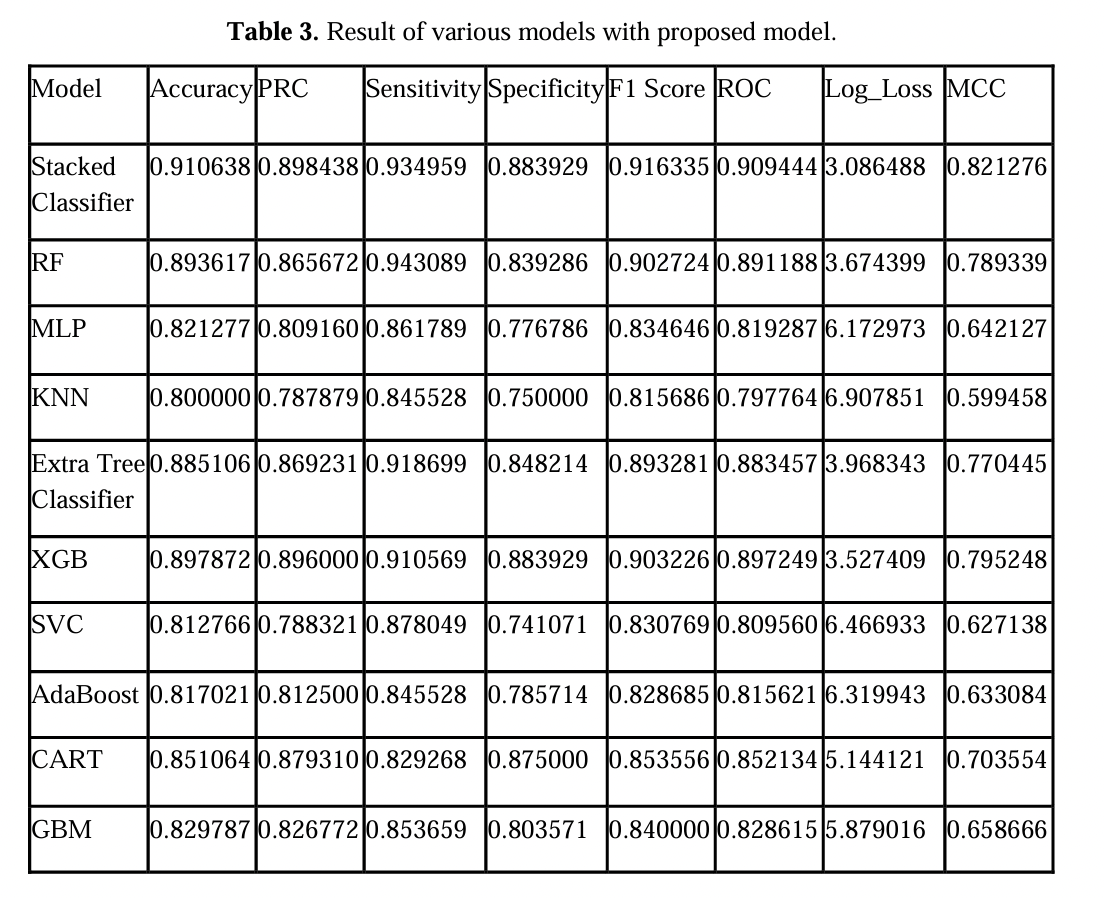

> Complexity refers to a calculation that defines the importance of a segment of the review, whereas recall refers to the number of times genuinely qualified people are recovered. 

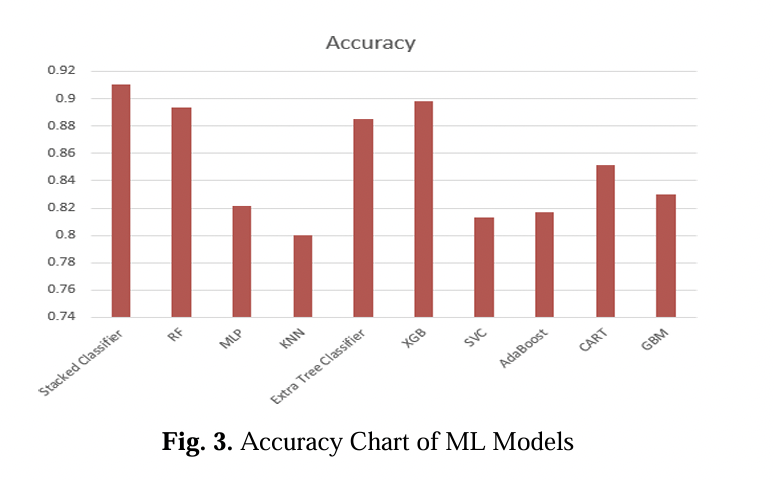

> This Figure-3 shows a visual depiction of effectiveness for all the other previously discussed machine learning techniques. Stacked classifier model's accuracy is 91.06%, however, the F1 score is 0.9163. The accuracy of the XGB and RF algorithms, on the other hand, is 89.78% and 89.36%, respectively, with F1 scores of 0.8972 and 0.8911. The accuracies of Extra Tree Classifiers, CART, GBM, MLP, SVC, and KNN algorithms are 88.51%, 85.10%, 82.97%, 82.12%, 81.27%, and 80.00%. 

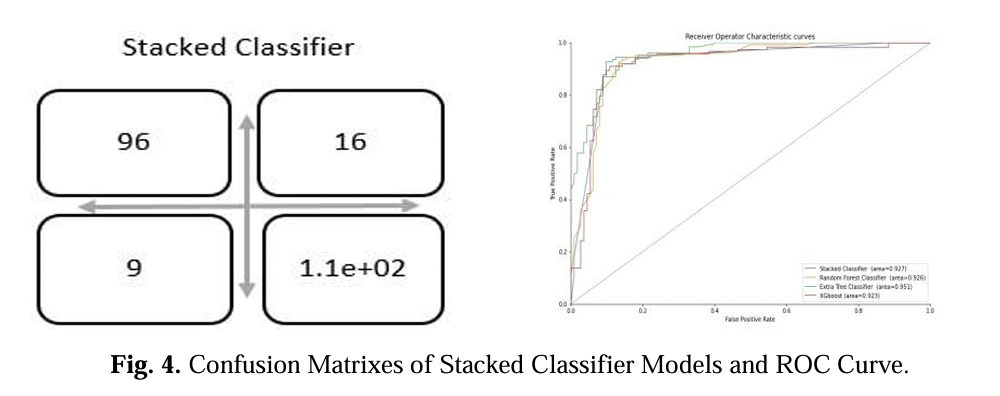
> The confusion matrix for the implemented system is generated as shown in the diagram above. In the area of machine learning, extracted features are also referred to as artificial neurons. It is a statistical form that allows the reproduction of the results of an approach. In the case of graph partitioning, an ensemble learning approach is extremely useful. Knowledge is, specifically, the complexity of quantitative categorization. 

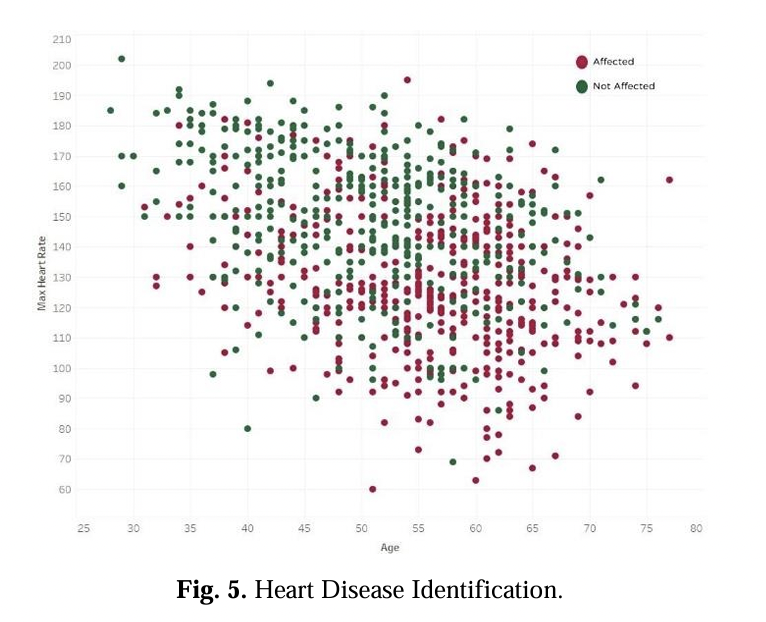

> Figure-5 depicts a visual representation of all cardiac problems being detected. Crimson indicates a heart attack, whereas verdant indicates no cardiac disease. 


# 1. Importing Libraries and Dataset

In [2]:
#import required libraries

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-statlog-cleveland-hungary-final/heart_statlog_cleveland_hungary_final.csv


In [3]:
#import dataset heart_statlog_cleveland_hungary_final.csv

dataset = pd.read_csv('/kaggle/input/heart-statlog-cleveland-hungary-final/heart_statlog_cleveland_hungary_final.csv')
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# 2. Analyze the dataset

This step focuses on:
* viewing the dataset
* attribute's data types
* null values


**We need to rename the columns to remove the spacing and for easier understanding and accessibility.**

In [4]:
# renaming features to proper name
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
#Checking missing entries in the dataset columnwise
dataset.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [6]:
dataset.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
target                       int64
dtype: object

# 3. Data Pre-processing

This step focuses on: 
* changing the attributes datatypes
* adding normalized columns


In [5]:
# converting features to categorical features 

dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 4] = 'asymptomatic'

dataset['rest_ecg'][dataset['rest_ecg'] == 0] = 'normal'
dataset['rest_ecg'][dataset['rest_ecg'] == 1] = 'ST-T wave abnormality'
dataset['rest_ecg'][dataset['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dataset['st_slope'][dataset['st_slope'] == 0] = 'normal'
dataset['st_slope'][dataset['st_slope'] == 1] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 2] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 3] = 'downsloping'

dataset["sex"] = dataset.sex.apply(lambda  x:'male' if x==1 else 'female')

In [8]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                    object
target                       int64
dtype: object

# 4. Visualizing Dataset

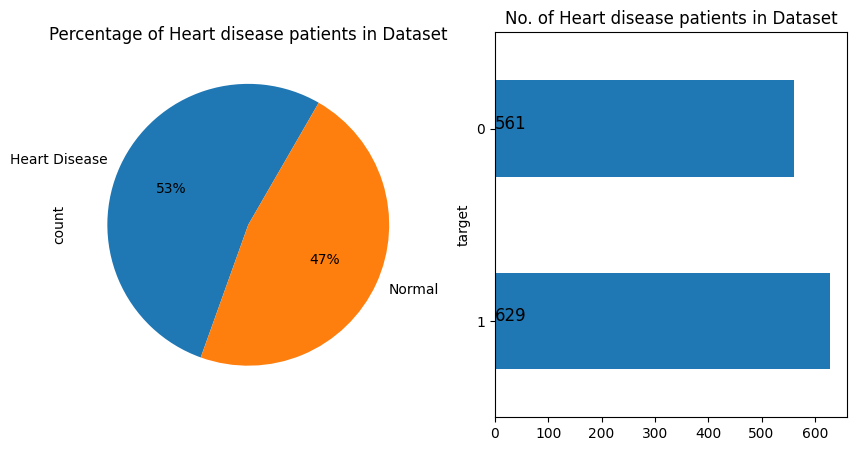

In [9]:
# Plotting attrition of employees

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dataset["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dataset["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

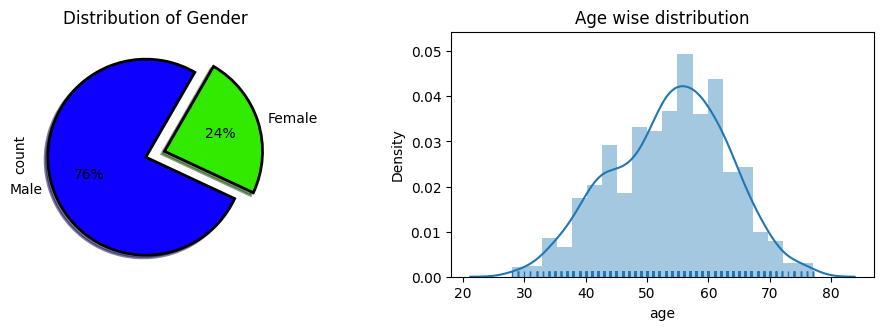

In [10]:
plt.figure(figsize=(12,7))
plt.subplot(221)
dataset["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dataset['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

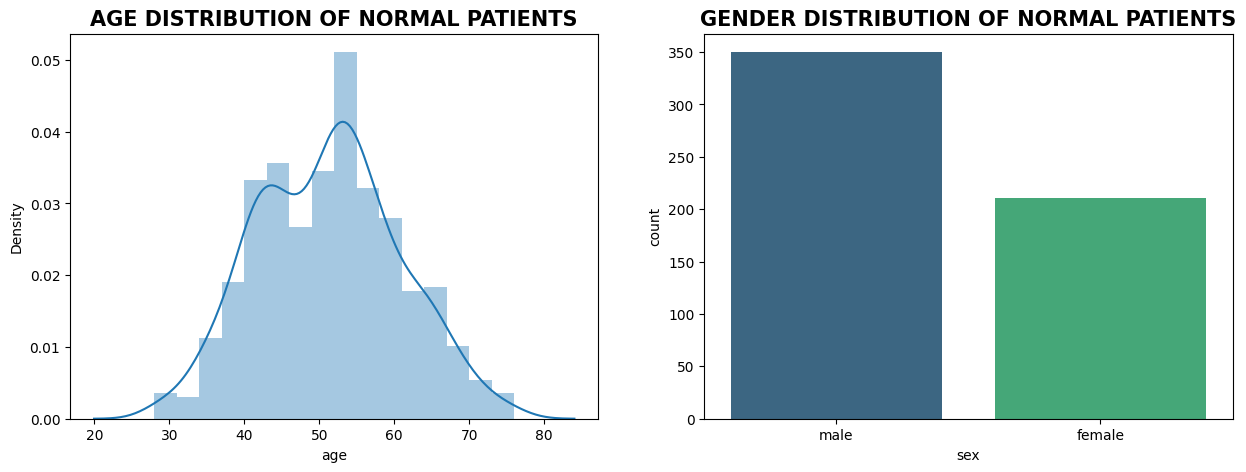

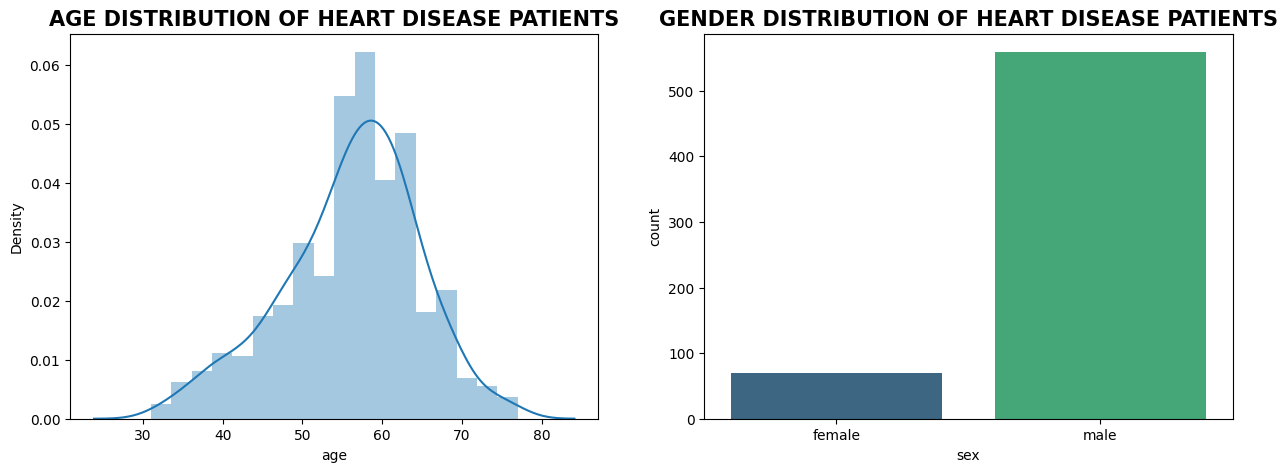

In [11]:
attr_1=dataset[dataset['target']==1]
attr_0=dataset[dataset['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x = attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x = attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

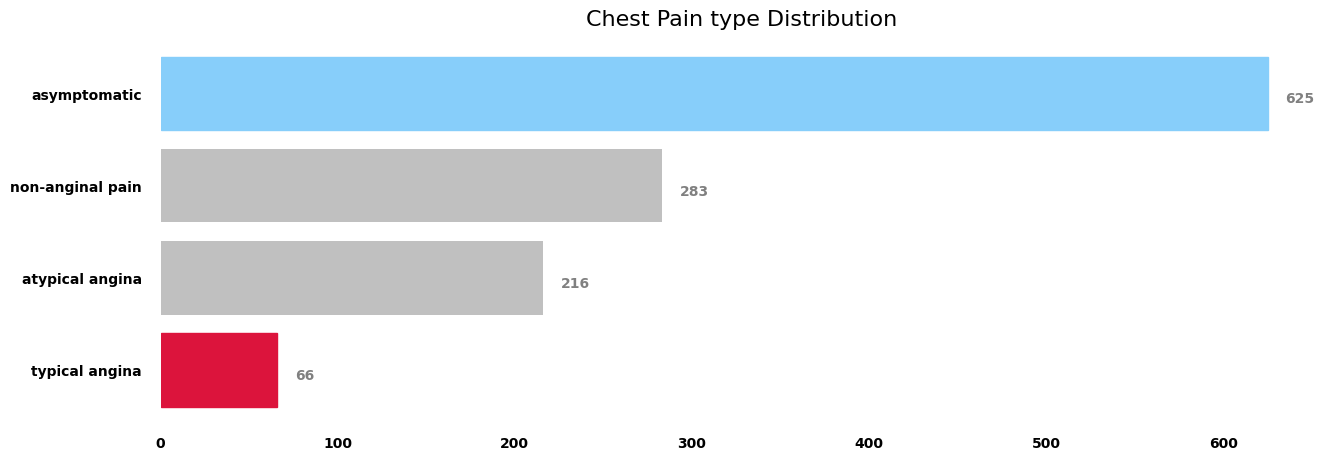

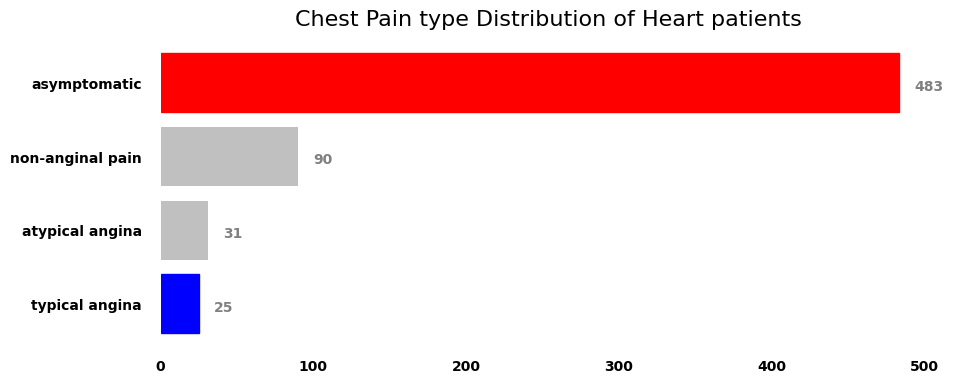

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

# Horizontal Bar Plot
title_cnt=dataset.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

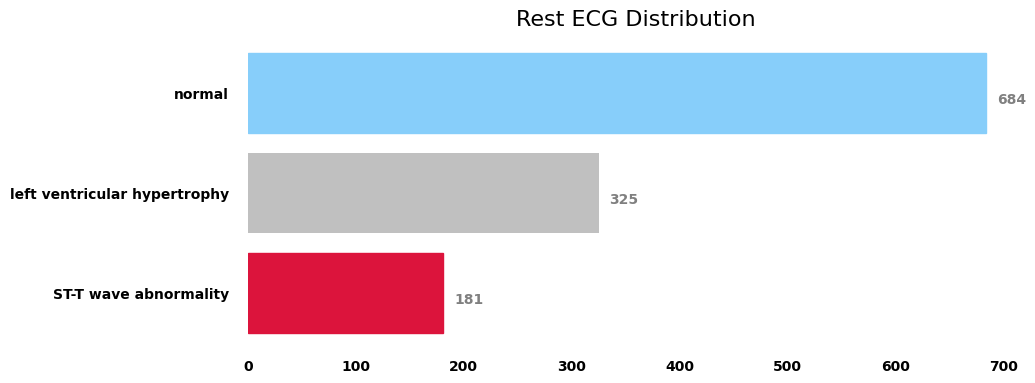

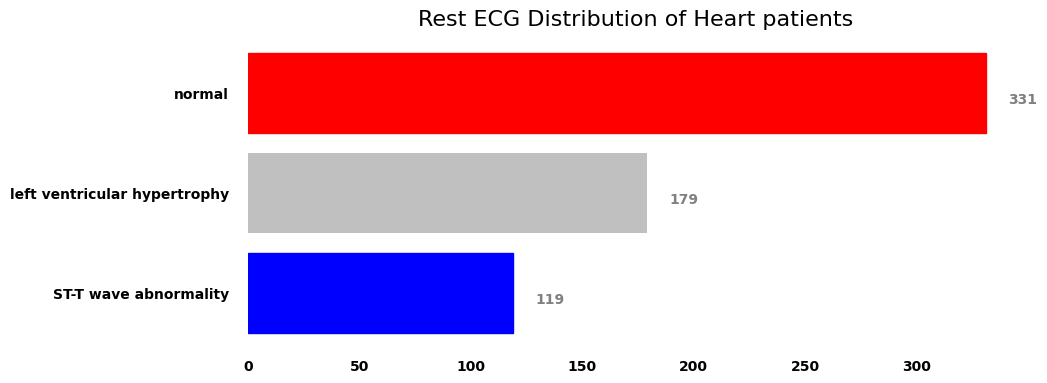

In [13]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dataset.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [14]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.920000
left ventricular hypertrophy,26.020000,28.460000
normal,62.920000,52.620000


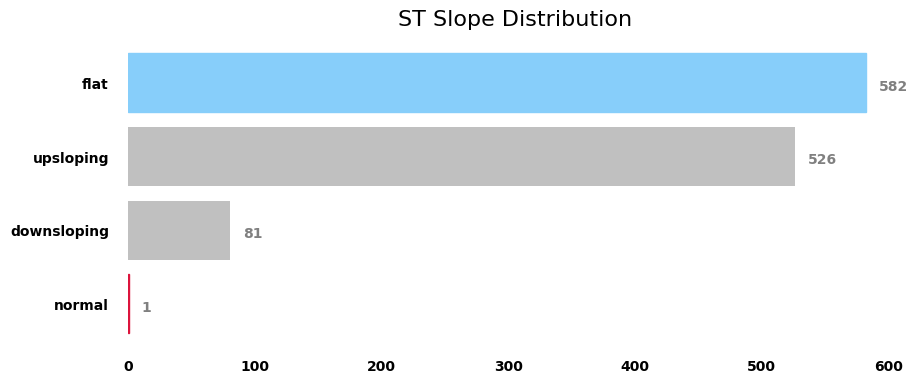

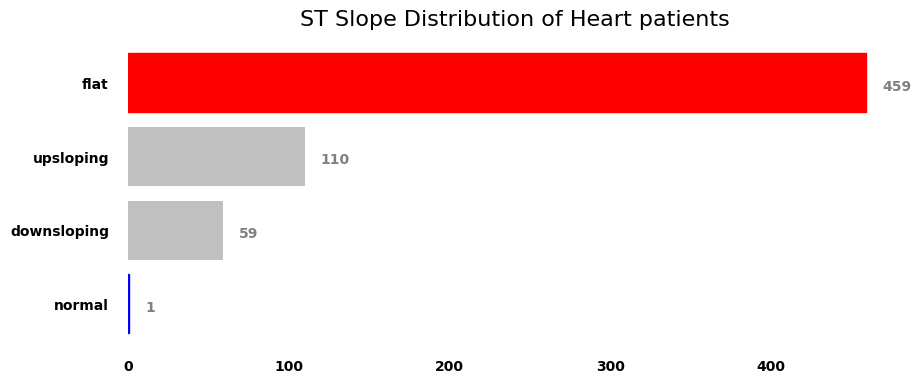

In [15]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dataset.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [16]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.380000
flat,21.930000,72.970000
normal,0.000000,0.160000
upsloping,74.150000,17.490000


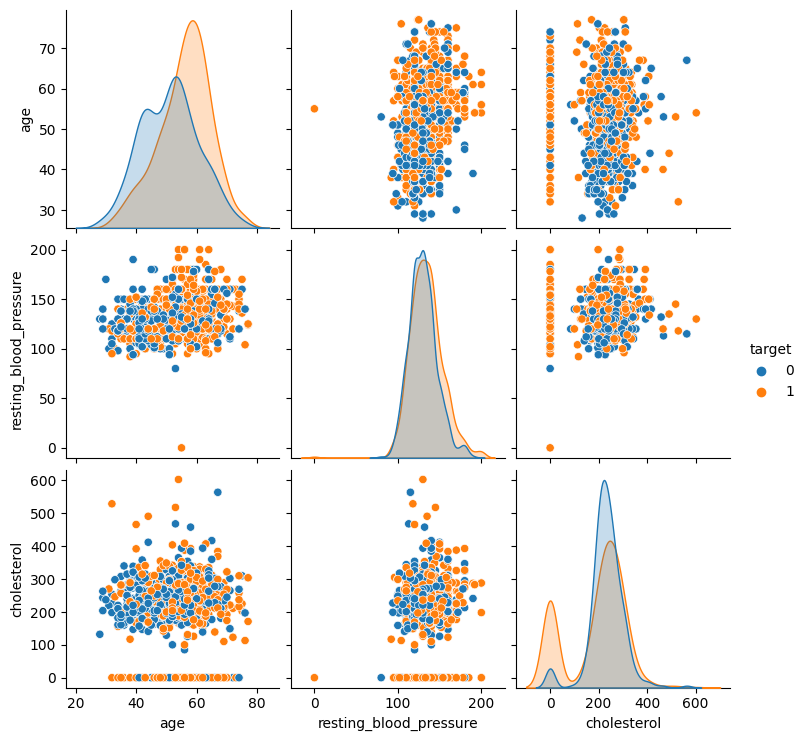

In [17]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

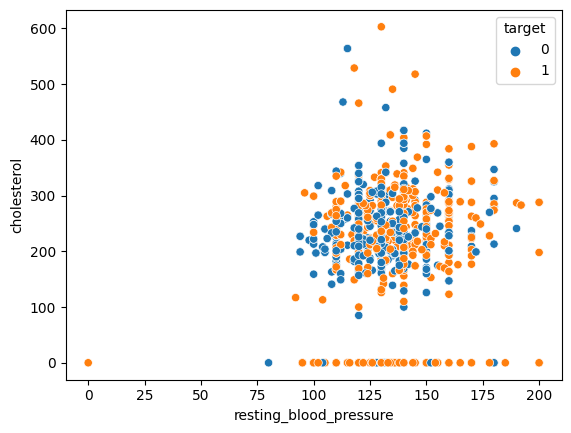

In [18]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dataset)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

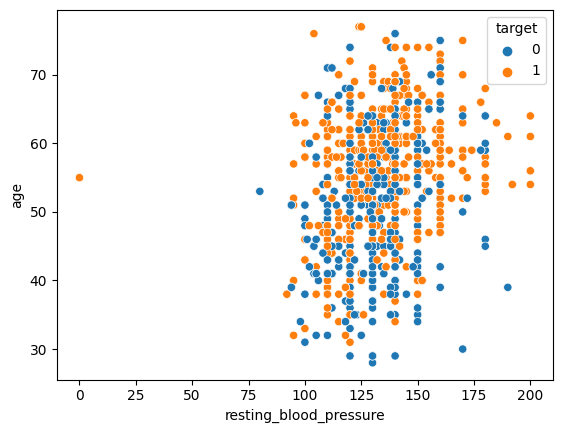

In [19]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dataset)

In [6]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dataset[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
dt_numeric

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
1185,45,110,264,132
1186,68,144,193,141
1187,57,130,131,115
1188,57,130,236,174


In [7]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466728                0.427328     0.775674                 1.265039
1     0.504600                1.516587     0.299512                 0.637758
2     1.787437                0.117301     0.716489                 1.636136
3     0.611503                0.318402     0.035867                 1.244085
4     0.029915                0.971958     0.151550                 0.695214
...        ...                     ...          ...                      ...
1185  0.932213                1.206560     0.529071                 0.303164
1186  1.526558                0.645180     0.171279                 0.049682
1187  0.350624                0.117301     0.782852                 0.969650
1188  0.350624                0.117301     0.252877                 1.343449
1189  1.680534                0.318402     0.348832                 1.304244

[1190 rows x 4 columns]


In [8]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [9]:
#filtering outliers retaining only those data points which are below threshhold
dataset = dataset[(z < 3).all(axis=1)]

In [10]:
# checking shape of dataset after outlier removal
dataset.shape

(1173, 12)

In [11]:
#encoding categorical variables
dataset = pd.get_dummies(dataset, drop_first=True)

dataset.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,False,True


In [12]:
# checking the shape of dataset
dataset.shape

(1173, 17)

In [13]:
# segregating dataset into features i.e., X and target variables i.e., y
y = dataset['target']
X = dataset.drop(['target'],axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

print('------------Training Set------------------\n')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\n------------Test Set------------------\n')
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

------------Training Set------------------

X_train:  (938, 16)
y_train:  (938,)

------------Test Set------------------

X_test:  (235, 16)
y_test:  (235,)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.193548,0.682281,0,0.562963,1,0.584416,True,False,False,False,False,True,True,False,False
787,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,True,False,False,True,True,False,True,False,False
208,0.142857,0.193548,0.523422,0,0.540741,0,0.194805,True,True,False,False,False,True,True,False,False
617,0.857143,0.408602,0.655804,0,0.311111,0,0.506494,True,False,False,False,True,False,True,False,False
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,False,False,False,False,False,False,True


In [16]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.301075,0.470468,0,0.851852,1,0.688312,True,False,False,True,False,True,True,False,False
835,0.530612,0.301075,0.525458,0,0.592593,0,0.246753,True,False,True,False,True,False,True,False,False
670,0.714286,0.516129,0.397149,0,0.829630,0,0.194805,False,True,False,False,False,True,False,False,True
502,0.714286,0.408602,0.627291,0,0.525926,1,0.454545,True,False,False,False,False,True,True,False,False
498,0.673469,0.580645,0.490835,0,0.600000,1,0.584416,True,False,False,False,False,True,False,False,False


In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    #basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    #basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    #basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    basedModels.append(('MLP', MLPClassifier()))
    #basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
      
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    #num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
                
    return names,results

In [32]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)

KNN7: 0.845436 (0.034630)
KNN5: 0.848616 (0.028049)
KNN9: 0.862480 (0.033086)
KNN11: 0.855022 (0.042299)
CART: 0.884855 (0.026438)
SVM Linear: 0.856108 (0.037732)
SVM RBF: 0.853958 (0.038028)
AB: 0.860398 (0.053193)
GBM: 0.893423 (0.029991)
RF_Ent100: 0.930702 (0.029428)
RF_Gini100: 0.923267 (0.027184)
ET100: 0.918966 (0.028265)
ET500: 0.920041 (0.028649)
ET1000: 0.918977 (0.027411)
MLP: 0.864653 (0.041642)
XGB_2000: 0.924319 (0.025343)
XGB_500: 0.923256 (0.024124)
XGB_100: 0.921128 (0.026966)
XGB_1000: 0.923256 (0.024124)


**With the results from the 10-fold cross- validation, we will pick the best performing models to further train our dataset on**

In [33]:
#RandomForest
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [34]:
#multi-layer perceptron (MLP)
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [35]:
#KNN
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [36]:
#Extremely Randomized Trees, or Extra Trees
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [37]:
#XGBoost classifier 
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 2500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [38]:
#Support Vector Classifier - Linear
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [39]:
#sgd = SGDClassifier(max_iter=1000, tol=1e-4)
#sgd.fit(X_train,y_train)
#y_pred_sgd = sgd.predict(X_test)

In [40]:
#Adaptive Boosting (AdaBoost Classifier)
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [41]:
#CART - decision tree classifier
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [42]:
#Gradient boosting (GBM)
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [44]:
import pandas as pd

data = {'Random Forest': y_pred_rfe, 
                'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                #'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

# Create an empty DataFrame to store the results
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

# Iterate through each model's predictions
for column in data:
    # Calculate metrics
    acc = accuracy_score(y_test, data[column])
    prec = precision_score(y_test, data[column])
    rec = recall_score(y_test, data[column])
    # Calculate True Negative (TN) and False Positive (FP)
    tn, fp, _, _ = confusion_matrix(y_test, data[column]).ravel()
    
    # Calculate Specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    f1 = f1_score(y_test, data[column])
    roc = roc_auc_score(y_test, data[column])
    loss_log = log_loss(y_test, data[column])
    mathew = matthews_corrcoef(y_test, data[column])
    
    #Append results to the DataFrame
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])
    
    #Append the results to the initialized DataFrame
    model_results = pd.concat([model_results, results], ignore_index=True)

# Display the final DataFrame
display(model_results)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.885106,0.863636,0.926829,0.839286,0.894118,0.883057,4.141186,0.771170
1,MLP,0.825532,0.805970,0.878049,0.767857,0.840467,0.822953,6.288467,0.651655
2,KNN,0.800000,0.787879,0.845528,0.750000,0.815686,0.797764,7.208731,0.599458
3,EXtra tree classifier,0.880851,0.868217,0.910569,0.848214,0.888889,0.879392,4.294563,0.761608
4,XGB,0.897872,0.902439,0.902439,0.892857,0.902439,0.897648,3.681054,0.795296
5,SVC,0.812766,0.788321,0.878049,0.741071,0.830769,0.809560,6.748599,0.627138
6,Adaboost,0.817021,0.812500,0.845528,0.785714,0.828685,0.815621,6.595222,0.633084
7,CART,0.855319,0.880342,0.837398,0.875000,0.858333,0.856199,5.214826,0.711624
8,GBM,0.821277,0.818898,0.845528,0.794643,0.832000,0.820086,6.441844,0.641570


In [45]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your training data
# Splitting the data into training and testing sets
S_train, S_test, s_train, s_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = [
    ('RandomForest_entropy', RandomForestClassifier(criterion='entropy', n_estimators=100)),
    ('MLP', MLPClassifier()),
    ('RandomForest_gini', RandomForestClassifier(criterion='gini', n_estimators=100)),
    ('KNN', KNeighborsClassifier(9)),
    ('XGB_1000', XGBClassifier(n_estimators=1000)),
    ('XGB_2500', XGBClassifier(n_estimators=2500)),
    ('SVC', SVC(kernel='linear', gamma='auto', probability=True)),
    ('AdaBoost', AdaBoostClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')),
    ('ExtraTrees_1000', ExtraTreesClassifier(n_estimators=1000)),
]

# Creating the stacking classifier
stacked_model = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier())

# Training the stacking model
stacked_model.fit(S_train, s_train)

# Making predictions on the test set
y_pred_stacked = stacked_model.predict(S_test)

# Evaluating the performance
accuracy = accuracy_score(s_test, y_pred_stacked)
print(f'Stacked Model Accuracy: {accuracy}')


Stacked Model Accuracy: 0.9234042553191489


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.923404,0.900709,0.969466,0.865385,0.933824,0.917425,2.760790,0.846423
1,Random Forest,0.885106,0.863636,0.926829,0.839286,0.894118,0.883057,4.141186,0.771170
2,MLP,0.825532,0.805970,0.878049,0.767857,0.840467,0.822953,6.288467,0.651655
3,KNN,0.800000,0.787879,0.845528,0.750000,0.815686,0.797764,7.208731,0.599458
4,EXtra tree classifier,0.880851,0.868217,0.910569,0.848214,0.888889,0.879392,4.294563,0.761608
5,XGB,0.897872,0.902439,0.902439,0.892857,0.902439,0.897648,3.681054,0.795296
6,SVC,0.812766,0.788321,0.878049,0.741071,0.830769,0.809560,6.748599,0.627138
7,Adaboost,0.817021,0.812500,0.845528,0.785714,0.828685,0.815621,6.595222,0.633084
8,CART,0.855319,0.880342,0.837398,0.875000,0.858333,0.856199,5.214826,0.711624
9,GBM,0.821277,0.818898,0.845528,0.794643,0.832000,0.820086,6.441844,0.641570


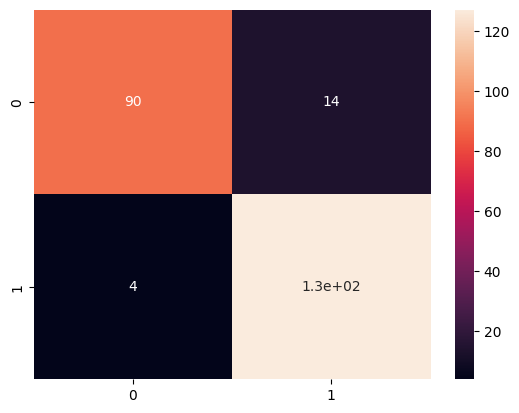

In [46]:
CM = confusion_matrix(s_test,y_pred_stacked)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(s_test, y_pred_stacked)
acc= accuracy_score(s_test, y_pred_stacked)
roc=roc_auc_score(s_test, y_pred_stacked)
prec = precision_score(s_test, y_pred_stacked)
rec = recall_score(s_test, y_pred_stacked)
f1 = f1_score(s_test, y_pred_stacked)
mathew = matthews_corrcoef(s_test, y_pred_stacked)

stacked_results = pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

#Append the results to the initialized DataFrame
model_results = pd.concat([stacked_results, model_results], ignore_index=True)

model_results

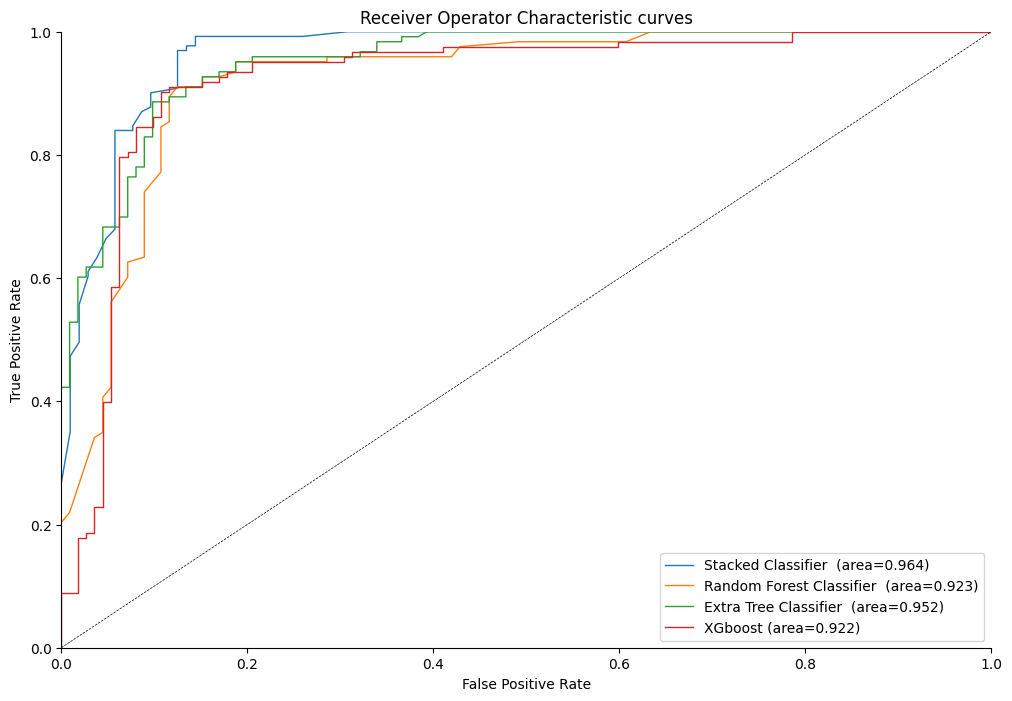

In [49]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(s_test,stacked_model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Improvments and Suggestions in: An Improved Heart Disease Prediction Using Stacked Ensemble Method 

**The below notebook section focuses on improvements and suggestion on how the code implemented in the above notebook section can be made better by minor modifications.**

**We will try to improve the overall performance and accuracy of the model using 2-level stacking technqiue.**
* **Two-level stacking is an ensemble learning technique that involves training multiple diverse base models in the first level and using their predictions to create a stacked dataset.** 
* **In the second level, a meta-model is trained on the stacked predictions to make the final predictions.** 
* **This approach leverages the collective strength of diverse models in the first level and the meta-model's ability to capture complex relationships in the ensemble's predictions, often leading to improved overall performance.**

**This notebook section will focus on the below methods to improve the results:**
1. Use feature selection to focus on attributes that contribute more to the target variable decision.
2. Evaluate all the base models and use only the ones that have better result for the target variable compared to others.
2. Use 2-level stacking: After feature selection and choosing only selected models, we will then move to 2-level stacking.

**The steps implemented in this notebook section are:**

1. Use feature selection to identify key attributes and remove the remaining from the dataset.
2. For a stacked ensemble technique, we stack all of the models such as RF, MLP, KNN, ETC, XGB, SVC, ADB, CART, and GBM and evaluate their performances.
3. Choose only the top performing models for stacking.
4. Perform 2-level stacking using selected base models and meta training.
5. Assess and compare the model to previous models. 

# 1. Feature Selection

**four different feature selection methods have been used:**

1. **Correlation-based Feature Selection:**
   - The `cor_selector` function uses correlation with the target variable (`y`) to select the top features based on their correlation scores.

2. **Chi-Square Feature Selection:**
   - The `chi_selector` function uses the chi-squared statistical test to select features that are most likely to be independent of the target variable (`y`).

3. **Recursive Feature Elimination (RFE):**
   - The `rfe_selector` function uses Recursive Feature Elimination with logistic regression as the base estimator to iteratively eliminate the least important features.
   
4. **Select From Model (Logistic Regression):**
   - The embeded_lr_selector function employs Select From Model with logistic regression as the base estimator. It selects features based on the importance assigned by the logistic regression model, retaining the most influential variables.

Using multiple feature selection methods allows for a comprehensive assessment of the dataset. Each method brings a unique perspective, helping to identify features that consistently contribute to predictive accuracy across different criteria. It's important to compare and analyze the results of these methods to gain insights into the relevance of individual features for the given predictive modeling task.

**Co-relation based Feature Selection**

The below function, `cor_selector`, performs feature selection based on correlation coefficients between features (independent variables) and a target variable `y`. Here's a breakdown of what it does:

1. **Calculate Correlation:** For each feature in the input dataset `X`, it calculates the correlation coefficient with the target variable `y`.

2. **Replace NaN values:** It replaces any NaN (Not a Number) values in the correlation list with 0.

3. **Feature Ranking:** It ranks the features based on the absolute values of their correlation coefficients and selects the top `num_feats` features.

4. **Feature Support List:** It creates a binary list (`cor_support`) indicating whether each feature is selected (`True`) or not (`False`).

The function then returns the support list and the list of selected features. The selected features are those with the highest absolute correlation coefficients with the target variable.

Finally, the function is called with the input data `X`, target variable `y`, and the specified number of features to select (`num_feats`), and the results are printed.

This is a simple feature selection method based on correlation coefficients, and it can be useful to identify features that have a stronger linear relationship with the target variable. Keep in mind that correlation-based feature selection might not capture non-linear relationships.

In [17]:
num_feats = 11

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        'Feature': feature_name,
        'Correlation': cor_list,
        'Support': cor_support
    })
    
    return result_df

result_df = cor_selector(X, y, num_feats)
print(f'{num_feats} selected features:')
print(result_df)



11 selected features:
                                  Feature  Correlation  Support
0                                     age     0.265492     True
1                  resting_blood_pressure     0.114377    False
2                             cholesterol    -0.203083     True
3                     fasting_blood_sugar     0.214780     True
4                 max_heart_rate_achieved    -0.418660     True
5                 exercise_induced_angina     0.483541     True
6                           st_depression     0.403287     True
7                                sex_male     0.312713     True
8         chest_pain_type_atypical angina    -0.366094     True
9        chest_pain_type_non-anginal pain    -0.235858     True
10         chest_pain_type_typical angina    -0.071143    False
11  rest_ecg_left ventricular hypertrophy     0.027932    False
12                        rest_ecg_normal    -0.106718    False
13                          st_slope_flat     0.516035     True
14                

**Feature Selection using the Chi-squared (chi2) statistical test.** 

The Chi-squared test is commonly used for feature selection, especially when dealing with categorical target variables.

1. **Scaling the Features:**
   This step scales the features using Min-Max scaling, which transforms the data into a specified range (usually between 0 and 1). Scaling is often recommended before applying certain feature selection methods to ensure that all features contribute equally.

2. **Selecting Features using Chi-squared Test:**
   The `SelectKBest` class from scikit-learn is used with the Chi-squared test (`chi2`) as the scoring function. It selects the top k features based on their scores. In this case, `num_feats` features are selected.

3. **Getting Selected Features and Displaying:**
   The `get_support` method retrieves a boolean mask of selected features. It then selects the corresponding feature names from the original dataset (`X`). Finally, it prints the number of selected features and their names.

This entire process is another approach to feature selection. The combination of correlation-based selection and Chi-squared selection might be employed to capture different aspects of the data. It's a common practice to try multiple feature selection methods to see which combination yields the best results for a given problem.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(f'{str(len(chi_feature))} selected features')
print('Selected features: \n', chi_feature)
print('Feature support: \n', chi_support)

11 selected features
Selected features: 
 ['age', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'rest_ecg_normal', 'st_slope_flat', 'st_slope_upsloping']
Feature support: 
 [ True False False  True  True  True  True  True  True  True False False
  True  True False  True]


**Recursive Feature Elimination (RFE), a feature selection technique, with logistic regression as the estimator is used below.**

1. **Initializing RFE Selector:**  
   rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
   
   - `estimator=LogisticRegression()`: Logistic Regression is chosen as the base estimator for RFE.
   - `n_features_to_select=num_feats`: Specifies the number of features to select, which is set to `num_feats`.
   - `step=10`: The number of features to remove at each step. In this case, every 10 features are removed.
   - `verbose=5`: Controls the verbosity of the output during the feature selection process. It prints information at each step.

2. **Fitting RFE Selector to the Data:**
   
   rfe_selector.fit(X_norm, y)
   This step fits the RFE selector to the scaled features (`X_norm`) and the target variable (`y`).

3. **Getting Selected Features and Displaying:**
  
   rfe_support = rfe_selector.get_support()
   rfe_feature = X.loc[:, rfe_support].columns.tolist()
   print(str(len(rfe_feature)), 'selected features')
  
   - `rfe_support`: Retrieves a boolean mask of selected features.
   - `rfe_feature`: Selects the corresponding feature names from the original dataset (`X`).
   - Finally, it prints the number of selected features and their names.

RFE is an iterative method that fits the model multiple times and eliminates the least important features at each step until the desired number of features is reached. In this case, it is set to select `num_feats` features.

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 16 features.
11 selected features


**SelectFromModel method from scikit-learn for feature selection is used next.**
* This method allows you to use the coefficients of a trained model to select the most important features. 
* In this case, it's using logistic regression as the base model.
* It's selecting features based on the L2-penalty logistic regression model. Features with non-zero coefficients in the logistic regression model are considered important and retained. The max_features parameter specifies the maximum number of features to select.

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='entropy'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [55]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

7 selected features


In [56]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
#feature_selection_df['Total'] = np.sum(str(feature_selection_df), axis=1)
feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_upsloping,True,True,True,False,True,True,5
3,st_slope_flat,True,True,True,True,True,False,5
4,max_heart_rate_achieved,True,True,True,False,True,True,5
5,exercise_induced_angina,True,True,True,False,True,True,5
6,cholesterol,True,False,True,True,True,True,5
7,age,True,True,True,False,True,True,5
8,sex_male,True,True,True,True,False,False,4
9,chest_pain_type_non-anginal pain,True,True,True,True,False,False,4
10,chest_pain_type_atypical angina,True,True,True,True,False,False,4


# **2. Prepare models for training using k-fold**

In [57]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dataset.drop(['target','resting_blood_pressure'],axis=1)
y = dataset['target']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.682281,0,0.562963,1,0.584416,True,False,False,False,False,True,True,False,False
787,0.836735,0.476578,1,0.474074,0,0.207792,True,False,False,True,True,False,True,False,False
208,0.142857,0.523422,0,0.540741,0,0.194805,True,True,False,False,False,True,True,False,False
617,0.857143,0.655804,0,0.311111,0,0.506494,True,False,False,False,True,False,True,False,False
253,0.673469,0.594705,0,0.355556,1,0.194805,True,False,False,False,False,False,False,False,True


In [60]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.470468,0,0.851852,1,0.688312,True,False,False,True,False,True,True,False,False
835,0.530612,0.525458,0,0.592593,0,0.246753,True,False,True,False,True,False,True,False,False
670,0.714286,0.397149,0,0.829630,0,0.194805,False,True,False,False,False,True,False,False,True
502,0.714286,0.627291,0,0.525926,1,0.454545,True,False,False,False,False,True,True,False,False
498,0.673469,0.490835,0,0.600000,1,0.584416,True,False,False,False,False,True,False,False,False


In [61]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)

KNN7: 0.847563 (0.030029)
KNN5: 0.836902 (0.026414)
KNN9: 0.857172 (0.033934)
KNN11: 0.848639 (0.041340)
CART: 0.881720 (0.027325)
SVM Linear: 0.855045 (0.039181)
SVM RBF: 0.853958 (0.036199)
AB: 0.862537 (0.041454)
GBM: 0.896591 (0.031923)
RF_Ent100: 0.927511 (0.028453)
RF_Gini100: 0.922180 (0.029715)
ET100: 0.916850 (0.028451)
ET500: 0.915786 (0.027079)
ET1000: 0.916850 (0.028051)
MLP: 0.867845 (0.048468)
XGB_2000: 0.922169 (0.025236)
XGB_500: 0.923233 (0.026016)
XGB_100: 0.921094 (0.033437)
XGB_1000: 0.923233 (0.025577)


In [62]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [63]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [65]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [66]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [67]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [68]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [69]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [70]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [71]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

# 3. Choose models to train using stacking

In [72]:
data = {'Random Forest': y_pred_rfe, 
                'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                #'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

# Create an empty DataFrame to store the results
new_model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

# Iterate through each model's predictions
for column in data:
    # Calculate metrics
    acc = accuracy_score(y_test, data[column])
    prec = precision_score(y_test, data[column])
    rec = recall_score(y_test, data[column])
    # Calculate True Negative (TN) and False Positive (FP)
    tn, fp, _, _ = confusion_matrix(y_test, data[column]).ravel()
    
    # Calculate Specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    f1 = f1_score(y_test, data[column])
    roc = roc_auc_score(y_test, data[column])
    loss_log = log_loss(y_test, data[column])
    mathew = matthews_corrcoef(y_test, data[column])
    
    #Append results to the DataFrame
    new_results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])
    
    #Append the results to the initialized DataFrame
    new_model_results = pd.concat([new_model_results, new_results], ignore_index=True)

# Display the final DataFrame
display(new_model_results)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.987808,0.779355
1,MLP,0.817021,0.789855,0.886179,0.741071,0.835249,0.813625,6.595222,0.636322
2,KNN,0.791489,0.776119,0.845528,0.732143,0.809339,0.788836,7.515485,0.582813
3,EXtra tree classifier,0.893617,0.882812,0.918699,0.866071,0.900398,0.892385,3.834431,0.787059
4,XGB,0.868085,0.853846,0.902439,0.830357,0.877470,0.866398,4.754695,0.736171
5,SVC,0.817021,0.794118,0.878049,0.750000,0.833977,0.814024,6.595222,0.635284
6,Adaboost,0.825532,0.810606,0.869919,0.776786,0.839216,0.823352,6.288467,0.650971
7,CART,0.880851,0.905983,0.861789,0.901786,0.883333,0.881787,4.294563,0.762744
8,GBM,0.821277,0.809160,0.861789,0.776786,0.834646,0.819287,6.441844,0.642127


# 4. Level 1 stacking using the chosen models

In [73]:
# Assuming X_train, y_train are your training data
# Splitting the data into training and testing sets
S_train, S_test, s_train, s_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = [
    ('RandomForest_entropy', RandomForestClassifier(criterion='entropy', n_estimators=100)),
    #('MLP', MLPClassifier()),
    ('RandomForest_gini', RandomForestClassifier(criterion='gini', n_estimators=100)),
    #('KNN', KNeighborsClassifier(9)),
    ('XGB_1000', XGBClassifier(n_estimators=1000)),
    ('XGB_2500', XGBClassifier(n_estimators=2500)),
    #('SVC', SVC(kernel='linear', gamma='auto', probability=True)),
    #('AdaBoost', AdaBoostClassifier()),
    #('DecisionTree', DecisionTreeClassifier()),
    #('GradientBoosting', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')),
    ('ExtraTrees_1000', ExtraTreesClassifier(n_estimators=1000)),
]

# Creating the stacking classifier
stacked_model = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier())

# Training the stacking model
stacked_model.fit(S_train, s_train)

# Making predictions on the test set
y_pred_stacked2 = stacked_model.predict(S_test)

# Evaluating the performance
accuracy = accuracy_score(s_test, y_pred_stacked2)
print(f'Stacked Model Accuracy: {accuracy}')


Stacked Model Accuracy: 0.9276595744680851


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Stacked Classifier,0.927660,0.925373,0.946565,0.903846,0.935849,0.925206,2.607413,0.853234
1,Random Forest,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.987808,0.779355
2,MLP,0.817021,0.789855,0.886179,0.741071,0.835249,0.813625,6.595222,0.636322
3,KNN,0.791489,0.776119,0.845528,0.732143,0.809339,0.788836,7.515485,0.582813
4,EXtra tree classifier,0.893617,0.882812,0.918699,0.866071,0.900398,0.892385,3.834431,0.787059
5,XGB,0.868085,0.853846,0.902439,0.830357,0.877470,0.866398,4.754695,0.736171
6,SVC,0.817021,0.794118,0.878049,0.750000,0.833977,0.814024,6.595222,0.635284
7,Adaboost,0.825532,0.810606,0.869919,0.776786,0.839216,0.823352,6.288467,0.650971
8,CART,0.880851,0.905983,0.861789,0.901786,0.883333,0.881787,4.294563,0.762744
9,GBM,0.821277,0.809160,0.861789,0.776786,0.834646,0.819287,6.441844,0.642127


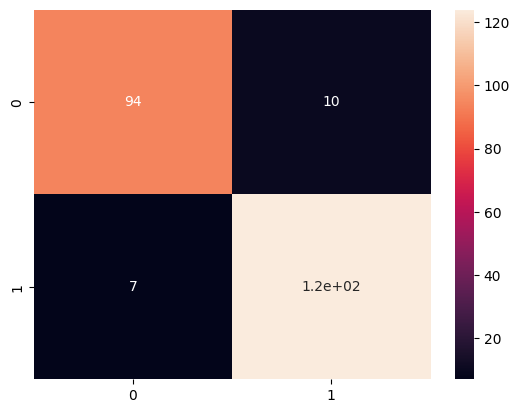

In [74]:
CM = confusion_matrix(s_test,y_pred_stacked2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(s_test, y_pred_stacked2)
acc= accuracy_score(s_test, y_pred_stacked2)
roc=roc_auc_score(s_test, y_pred_stacked2)
prec = precision_score(s_test, y_pred_stacked2)
rec = recall_score(s_test, y_pred_stacked2)
f1 = f1_score(s_test, y_pred_stacked2)
mathew = matthews_corrcoef(s_test, y_pred_stacked2)

stacked_results2 = pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

#Append the results to the initialized DataFrame
new_model_results = pd.concat([stacked_results2, new_model_results], ignore_index=True)

new_model_results


# 5. Perform 2-level stacking to achieve better results

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets for level 1
S_train, S_test, s_train, s_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Defining the models for the first layer
models_layer1 = [
    ('RandomForest_entropy', RandomForestClassifier(criterion='entropy', n_estimators=100)),
    ('RandomForest_gini', RandomForestClassifier(criterion='gini', n_estimators=100)),
    ('XGB_1000', XGBClassifier(n_estimators=1000)),
    ('XGB_2500', XGBClassifier(n_estimators=2500)),
    ('ExtraTrees_1000', ExtraTreesClassifier(n_estimators=1000)),
]

# Creating the stacking classifier for the first layer
stacked_model_layer1 = StackingClassifier(estimators=models_layer1, final_estimator=RandomForestClassifier())

# Training the stacking model for the first layer
stacked_model_layer1.fit(S_train, s_train)

# Making predictions on the test set for the first layer
predictions_layer1 = stacked_model_layer1.predict(S_test)

# Evaluating the performance of the first layer
accuracy_layer1 = accuracy_score(y_test, predictions_layer1)
print(f'Stacked Model Level 1 Accuracy: {accuracy_layer1}')

# Creating the input features for the second layer
S_train_layer2 = stacked_model_layer1.transform(X_train)
S_test_layer2 = stacked_model_layer1.transform(X_test)

# Defining the model for the second layer (meta-model)
meta_model = RandomForestClassifier(criterion='entropy',n_estimators=100)

# Training the meta-model on the stacked predictions
meta_model.fit(S_train_layer2, y_train)

# Making predictions on the test set using the entire ensemble
final_predictions = meta_model.predict(S_test_layer2)

# Evaluating the performance
accuracy = accuracy_score(y_test, final_predictions)
print(f'Final Model Accuracy: {accuracy}')

Final Model Accuracy: 0.9404255319148936


# 6. Evaluate performances

In [21]:
CM = confusion_matrix(s_test,final_predictions)
#sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(s_test, final_predictions)
acc= accuracy_score(s_test, final_predictions)
roc=roc_auc_score(s_test, final_predictions)
prec = precision_score(s_test, final_predictions)
rec = recall_score(s_test, final_predictions)
f1 = f1_score(s_test, final_predictions)
mathew = matthews_corrcoef(s_test, final_predictions)

layered_stacked_results = pd.DataFrame([['Stacked Classifier 2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

#Append the results to the initialized DataFrame
layered_model_results = pd.concat([layered_stacked_results, new_model_results], ignore_index=True)

layered_model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Stacked Classifier 2,0.940425,0.905670,0.919360,0.899400,0.910425,0.949360,3.532712,0.845319
1,Stacked Classifier,0.927660,0.925373,0.946565,0.903846,0.935849,0.925206,2.607413,0.853234
2,Random Forest,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.987808,0.779355
3,MLP,0.817021,0.789855,0.886179,0.741071,0.835249,0.813625,6.595222,0.636322
4,KNN,0.791489,0.776119,0.845528,0.732143,0.809339,0.788836,7.515485,0.582813
5,EXtra tree classifier,0.893617,0.882812,0.918699,0.866071,0.900398,0.892385,3.834431,0.787059
6,XGB,0.868085,0.853846,0.902439,0.830357,0.877470,0.866398,4.754695,0.736171
7,SVC,0.817021,0.794118,0.878049,0.750000,0.833977,0.814024,6.595222,0.635284
8,Adaboost,0.825532,0.810606,0.869919,0.776786,0.839216,0.823352,6.288467,0.650971
9,CART,0.880851,0.905983,0.861789,0.901786,0.883333,0.881787,4.294563,0.762744


# Conclusions

* **Predicting cardiac illness has become a major concern and priority in the medical industry. Using the Stacked Ensemble Classifier, we have shown an improved heart disease prediction method. It incorporates a number of different prediction techniques.**
* **In this work, we examined the significance of prediction performance, precision, ROC sensitivity, Specificity, F1 Score, Log Loss, and MCC.** 
* **To identify whether or not a person has a heart problem, we applied machine learning techniques. As a consequence of the findings, we discovered that the enhanced stacked ensemble approach provides better accuracy than previous methods.** 
* **For future research possibilities, we will aim to train and test on a large medical data set using many ensemble methods to see if we can enhance their performance.** 
* **Our ensemble method is superior to traditional methods, as even if it is overfitting at times, it usually reduces variances, as well as minimizes modeling method bias. It also has superior Predictive performance, reduces dispersion and our approach has superior efficiency by choosing the best combination of models.** 

# Recommendations

* **Feature selection is crucial for enhancing model efficiency and interpretability by identifying relevant variables.** 
* **When combined with multi-layered stacking, it further refines the model's predictive power. By selecting the most informative features, the stacking ensemble can focus on key patterns and relationships, potentially improving generalization to new data.**
* **Feature selection helps in eliminating noise and redundancy, enhancing the ensemble's ability to capture complex relationships. Multi-layered stacking leverages diverse base models, mitigating biases and producing more robust predictions. This combined approach contributes to higher accuracy, precision, and overall model effectiveness.**
* **While stacking is a powerful technique, caution is needed to avoid overfitting, especially when using multiple layers of models. It's essential to strike a balance between model complexity and generalization.**
* **Additionally, stacking may be computationally intensive, requiring careful consideration of resource constraints.**
* **Interpretability may also be a challenge as the ensemble becomes more complex.** 
* **Practitioners should validate results rigorously and be mindful of the potential for increased model complexity leading to diminished interpretability and longer training times.**